# Imports:

In [1]:
# To prevent the annoying warning from scikit learn package
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('ggplot')

# Dataset Reference:
# https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

# Checking the Data

In [3]:
#Import Raw Data
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


<li> The dataset contains 5110 Observations and 12 columns </li>

In [4]:
#Prints the first 5 rows of the data
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# prints the shape
data.shape

(5110, 12)

In [6]:
# displays the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Cleaning the Dataset

In [7]:
#checks for null values and counts them
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
# Groups the data by gender and gets mean of BMI
data.groupby('gender')['bmi'].mean()

gender
Female    29.065758
Male      28.647936
Other     22.400000
Name: bmi, dtype: float64

In [9]:
# fills null values with BMI mean
data = data.fillna(data.mean())
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
# drops unneccesary columns
data= data.drop(columns='id')

In [11]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


# Data distribution:

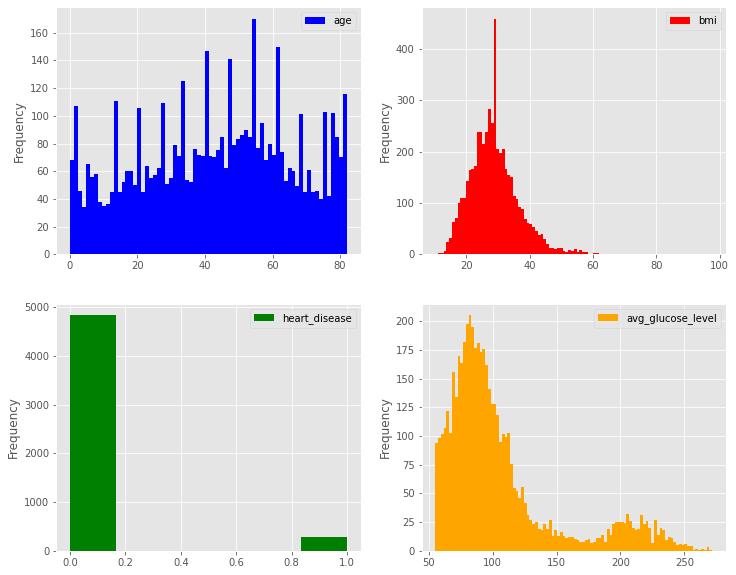

In [12]:
# Creates bar graphs of distributions of the data

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
data.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
data.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[0][1])
data.plot(kind="hist", y="heart_disease", bins=6, color="g", ax=axes[1][0])
data.plot(kind="hist", y="avg_glucose_level", bins=100, color="orange", ax=axes[1][1])
plt.show()

Graph Indicates:
<li> Good distribution for age </li>
<li> BMI contained outliers before cleaning data (Removed Outliers) </li>
<li> Average glucose is evenly distributed. Normal average blood sugar level is under 140, Therefore this feature cant be used to identify a correlation between diabetes and strokes </li>

# Evaluating the Data

## Stroke Pie Chart

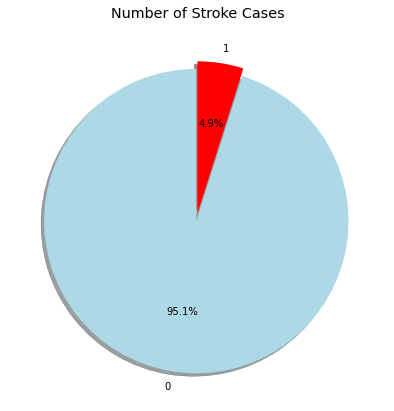

In [13]:
# Creates Pie chart for stroke vs non-strokes
labels =data['stroke'].value_counts(sort = True).index
sizes = data['stroke'].value_counts(sort = True)

# sets the colors for the pie chart
colors = ["lightblue","red"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Number of Stroke Cases')
plt.show()

Pie Chart Illustrates:
<li> Only 4.9% of people suffer from a stroke  </li>

## Gender & Stroke graph:

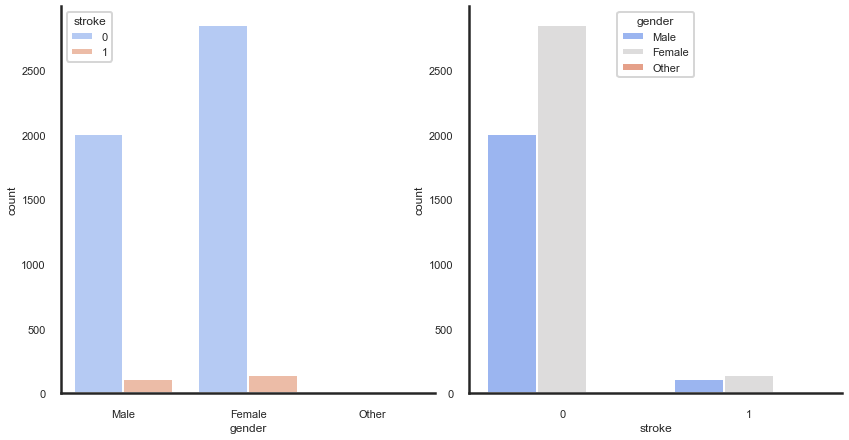

In [14]:
# creates a bar graph of the number of stroke cases by gender
fig = plt.figure(figsize=(14,11))
gs = fig.add_gridspec(3,4)
sns.set_style("white")
sns.set_context("poster", font_scale = 0.5)

ax_gender_stroke = fig.add_subplot(gs[:2,:2])
sns.countplot(x='gender', hue='stroke', data=data, ax=ax_gender_stroke, palette='coolwarm')
sns.despine()

ax_gender_stroke = fig.add_subplot(gs[:2,2:4], sharey=ax_gender_stroke)
sns.countplot(x='stroke', hue='gender', data=data, ax=ax_gender_stroke, palette='coolwarm')
sns.despine()

plt.show()

Graph Illustrates:
<li> Visually the difference in total number of stroke cases between men and women is very small </li>

In [15]:
# Drop unnecassary columns ('Other' can cause outliers in the model)
data_delete = data[data['gender'] == 'Other'].index
data = data.drop(data_delete)

# count stroke victims by gender
data.groupby(['gender', 'stroke'])['stroke'].count()

gender  stroke
Female  0         2853
        1          141
Male    0         2007
        1          108
Name: stroke, dtype: int64

Count indicates:
<li> The dataset contains more Females than males </li>
<li> Proportionally Males are more likely to have a stroke</li>

## Married & Stroke Graph:

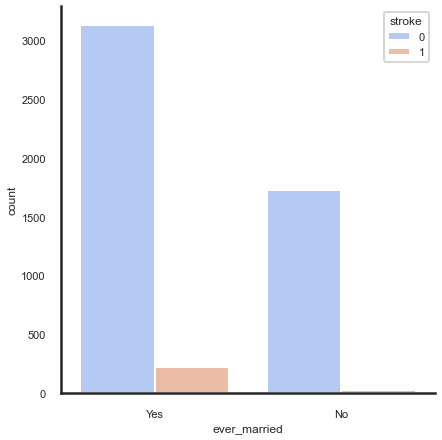

In [16]:
# creates a bar graph of the number of stroke cases by Marriage

fig = plt.figure(figsize=(14,11))
gs = fig.add_gridspec(3,4)
sns.set_style("white")
sns.set_context("poster", font_scale = 0.5)

ax_gender_stroke = fig.add_subplot(gs[:2,:2])
sns.countplot(x='ever_married', hue='stroke', data=data, ax=ax_gender_stroke, palette='coolwarm')
sns.despine()

plt.show()

Stroke vs Married Graph illustrates:
<li> There is a higher chance of having a stroke if you are married </li>

## Residence & Stroke Graph:

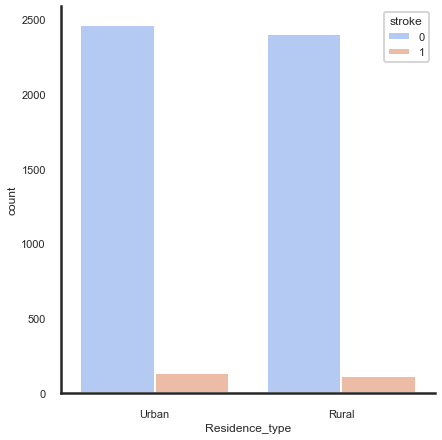

In [17]:
# creates a bar graph of the number of stroke cases by Residence
fig = plt.figure(figsize=(14,11))
gs = fig.add_gridspec(3,4)
sns.set_style("white")
sns.set_context("poster", font_scale = 0.5)

ax_gender_stroke = fig.add_subplot(gs[:2,:2])
sns.countplot(x='Residence_type', hue='stroke', data=data, ax=ax_gender_stroke, palette='coolwarm')
sns.despine()

plt.show()

In [18]:
# groups and counts the data by residence
data.groupby(['Residence_type', 'stroke'])['stroke'].count()

Residence_type  stroke
Rural           0         2399
                1          114
Urban           0         2461
                1          135
Name: stroke, dtype: int64

There is a higher risk of a stroke if the person lives in an Urban Area

## Work-type & Stroke Graph:

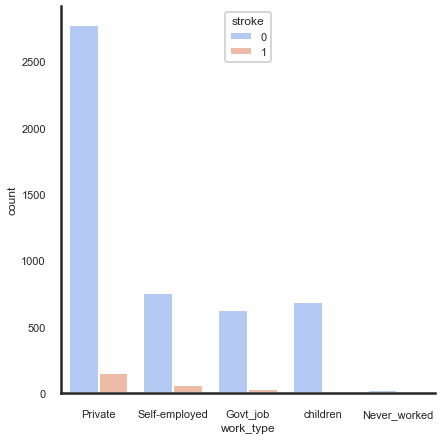

In [19]:
# creates a bar graph of the number of stroke cases by work type
fig = plt.figure(figsize=(14,11))
gs = fig.add_gridspec(3,4)
sns.set_style("white")
sns.set_context("poster", font_scale = 0.5)

ax_gender_stroke = fig.add_subplot(gs[:2,:2])
sns.countplot(x='work_type', hue='stroke', data=data, ax=ax_gender_stroke, palette='coolwarm')
sns.despine()

plt.show()

Worktype vs Stroke Graph illustrates:
<li> There is a higher chance of having a stroke if you work</li>

## Smoking & Stroke Graph:

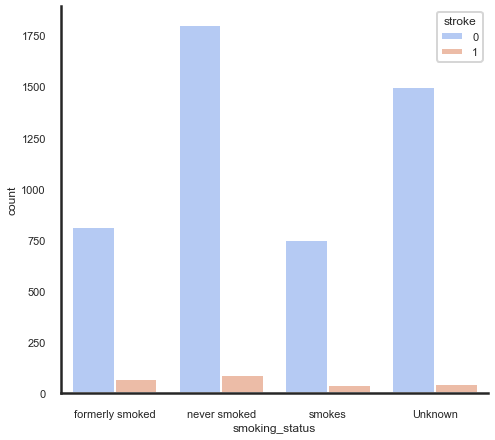

In [20]:
# creates a bar graph of the number of stroke cases by smoking status
fig = plt.figure(figsize=(16,11))
gs = fig.add_gridspec(3,4)
sns.set_style("white")
sns.set_context("poster", font_scale = 0.5)

ax_gender_stroke = fig.add_subplot(gs[:2,:2])
sns.countplot(x='smoking_status', hue='stroke', data=data, ax=ax_gender_stroke, palette='coolwarm')
sns.despine()

plt.show()

Smoking Vs Stroke graph illustrates:
<li> No strong relationship between smoking and strokes</li>
<li> More likely to have a stroke if a person smokes </li>

In [21]:
# counts and groups the data by smoking status
data.groupby(['smoking_status', 'stroke'])['stroke'].count()

smoking_status   stroke
Unknown          0         1497
                 1           47
formerly smoked  0          814
                 1           70
never smoked     0         1802
                 1           90
smokes           0          747
                 1           42
Name: stroke, dtype: int64

Smoking increases the risk of having a stroke

## Age & Stroke Graph:

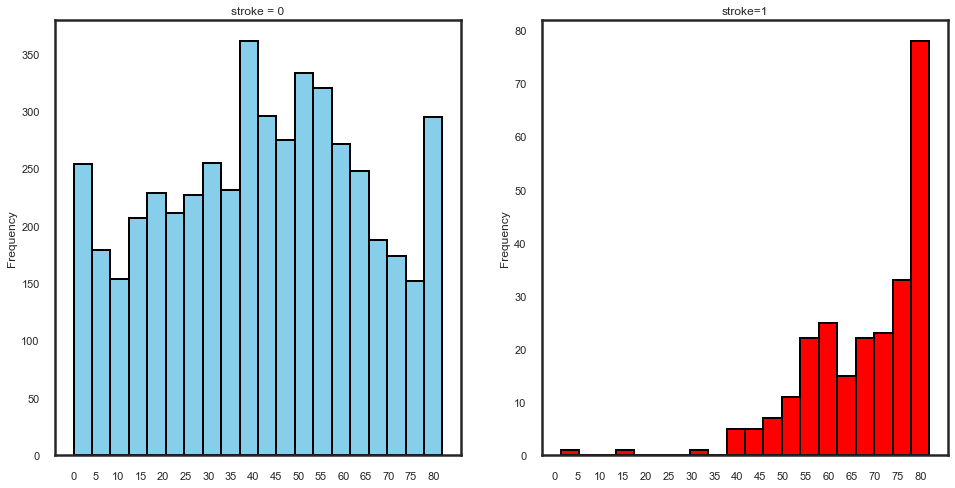

In [22]:
# creates a bar graph of the number of stroke cases by Age
f,ax = plt.subplots(1,2, figsize=(16,8))

data.loc[data['stroke'] ==0]['age'].plot.hist(ax=ax[0], bins=20, edgecolor='black', color='skyblue')
ax[0].set_title('stroke = 0')
ax1 = list(range(0, 85, 5))
ax[0].set_xticks(ax1)

data[data['stroke']==1]['age'].plot.hist(ax=ax[1], color='red', bins=20, edgecolor='black')
ax[1].set_title('stroke=1')
x2=list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()


Strokes are more common among older people (55 or older)

## Hypertension & Stroke Graph:

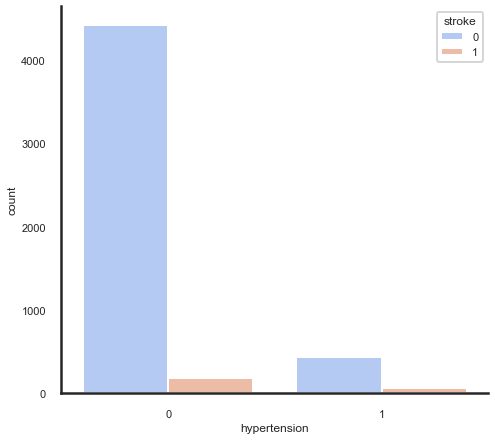

In [23]:
# creates a bar graph of the number of stroke cases by Hypertension
fig = plt.figure(figsize=(16,11))
gs = fig.add_gridspec(3,4)
sns.set_style("white")
sns.set_context("poster", font_scale = 0.5)

ax_gender_stroke = fig.add_subplot(gs[:2,:2])
sns.countplot(x='hypertension', hue='stroke', data=data, ax=ax_gender_stroke, palette='coolwarm')
sns.despine()

plt.show()

In [24]:
# groups and counts the data by hyper tension
data.groupby(['hypertension', 'stroke'])['stroke'].count()

hypertension  stroke
0             0         4428
              1          183
1             0          432
              1           66
Name: stroke, dtype: int64

The Graph illustrates:
<li> Hypertension isnt directly linked to having a stroke </li>
<li>Higher risk of stroke if person has hypertension</li>

## Heart Disease & Stroke:

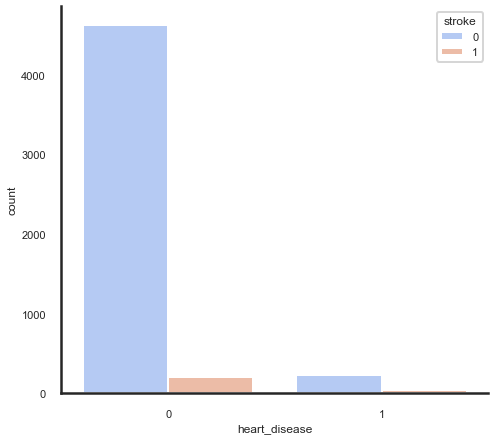

In [25]:
# creates a bar graph of the number of stroke cases by heart disease
fig = plt.figure(figsize=(16,11))
gs = fig.add_gridspec(3,4)
sns.set_style("white")
sns.set_context("poster", font_scale = 0.5)

ax_gender_stroke = fig.add_subplot(gs[:2,:2])
sns.countplot(x='heart_disease', hue='stroke', data=data, ax=ax_gender_stroke, palette='coolwarm')
sns.despine()

In [26]:
# groups and counts the data by heart disease
data.groupby(['heart_disease', 'stroke'])['stroke'].count()

heart_disease  stroke
0              0         4631
               1          202
1              0          229
               1           47
Name: stroke, dtype: int64

The Graph illustrates:
<li> Heart disease isnt directly linked to having a stroke </li>
<li>Higher risk of stroke if person has Heart disease</li>

## Gluclose level Graph:

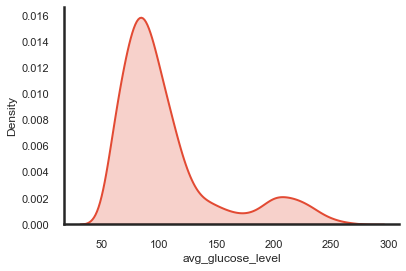

In [27]:
# creates distribution graph for avg glucose level
sns.kdeplot('avg_glucose_level', data=data, shade=True)
sns.set_style("white")
sns.despine()

<li>Majority of people Average Gluclose level is between 0 - 50 </li>

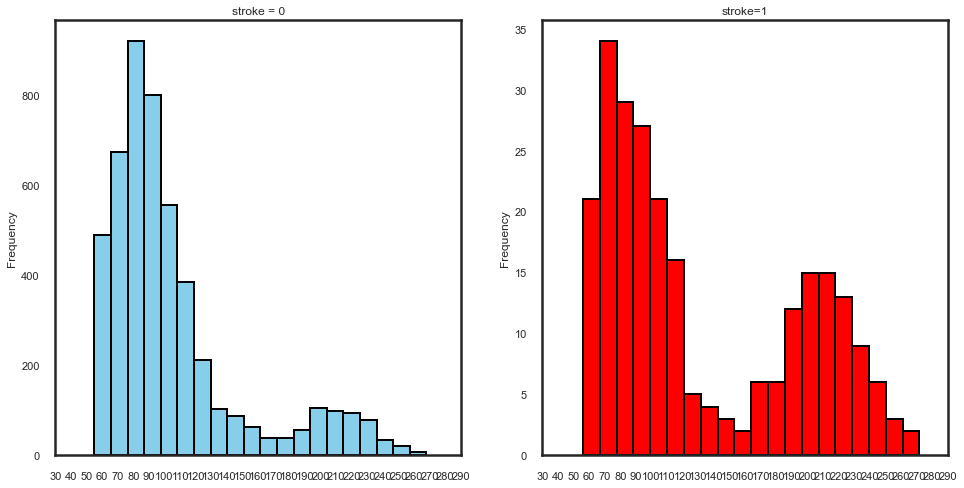

In [28]:
# creates a bar graph of the number of non stroke cases by glucose levels
f,ax = plt.subplots(1,2, figsize=(16,8))

data.loc[data['stroke'] ==0]['avg_glucose_level'].plot.hist(ax=ax[0], bins=20, edgecolor='black', color='skyblue')
ax[0].set_title('stroke = 0')
ax1 = list(range(30, 300, 10))
ax[0].set_xticks(ax1)

# creates a bar graph of the number of stroke cases by glucose levels
data.loc[data['stroke']==1]['avg_glucose_level'].plot.hist(ax=ax[1], color='red', bins=20, edgecolor='black')
ax[1].set_title('stroke=1')
x2= list(range(30, 300, 10))
ax[1].set_xticks(x2)
plt.show()

<li> High average gluclose levels can increase risk of stroke</li>

## BMI & Stroke Graph:

(array([4.110e+02, 1.963e+03, 2.010e+03, 5.750e+02, 1.050e+02, 3.700e+01,
        4.000e+00, 2.000e+00, 0.000e+00, 2.000e+00]),
 array([10.3 , 19.03, 27.76, 36.49, 45.22, 53.95, 62.68, 71.41, 80.14,
        88.87, 97.6 ]),
 [<matplotlib.patches.Polygon at 0x1f2fd6e55a0>])

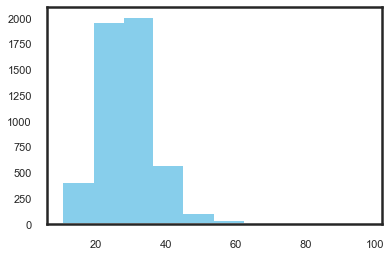

In [29]:
# creates a histogram of the number of stroke cases by BMI
plt.hist('bmi', data=data, histtype='stepfilled',color='skyblue')

<li> Majority of data(BMIs) falls bewteen 20 - 30 </li>

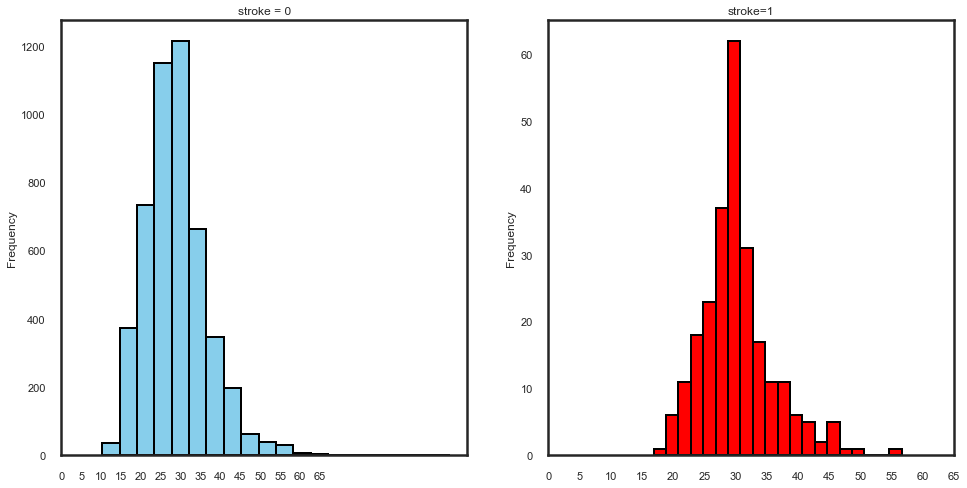

In [30]:
# creates a bar graph of the number of non stroke cases by BMI
f,ax = plt.subplots(1,2, figsize=(16,8))

data.loc[data['stroke'] ==0]['bmi'].plot.hist(ax=ax[0], bins=20, edgecolor='black', color='skyblue')
ax[0].set_title('stroke = 0')
ax1 = list(range(0, 70, 5))
ax[0].set_xticks(ax1)

# creates a bar graph of the number of stroke cases by BMI
data.loc[data['stroke']==1]['bmi'].plot.hist(ax=ax[1], color='red', bins=20, edgecolor='black')
ax[1].set_title('stroke=1')
x2= list(range(0, 70, 5))
ax[1].set_xticks(x2)
plt.show()

The graph illustrates:
<li> The higher the BMI does not increase the risk of a stroke</li>

In [31]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


# Feature Engineering:

In [32]:
# Categorical Features:
# Replaces the categorical features with dummy variables (0 or 1)
cat_columns = [c for c, t in zip(data.dtypes.index, data.dtypes) if t == 'O']

data = pd.get_dummies(data = data, columns = cat_columns)
data = pd.get_dummies(data = data, columns = ['hypertension'])
data = pd.get_dummies(data = data, columns = ['heart_disease'])

data.columns

Index(['age', 'avg_glucose_level', 'bmi', 'stroke', 'gender_Female',
       'gender_Male', 'ever_married_No', 'ever_married_Yes',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'hypertension_0', 'hypertension_1',
       'heart_disease_0', 'heart_disease_1'],
      dtype='object')

In [33]:
# Numerical Features
# Replaces and converts numerical features to float ()
num_columns = [c for c, t in zip(data.dtypes.index, data.dtypes) if t == 'float64']
num_columns

['age', 'avg_glucose_level', 'bmi']

In [34]:
# Scales the new numerical features to mean = 0 and standard deviation = 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[num_columns] = scaler.fit_transform(data[num_columns])

data[num_columns]

,age,avg_glucose_level,bmi
0,0.816895,0.801265,0.301260
1,0.743652,0.679023,0.212981
2,0.975586,0.234512,0.254296
3,0.597168,0.536008,0.276060
4,0.963379,0.549349,0.156930
...,...,...,...
5105,0.975586,0.132167,0.212981
5106,0.987793,0.323516,0.340206
5107,0.426270,0.128658,0.232532
5108,0.621582,0.513203,0.175258


In [35]:
data.head()

,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,...,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1
0,0.816895,0.801265,0.301260,1,0,1,0,1,0,0,...,0,1,0,1,0,0,1,0,0,1
1,0.743652,0.679023,0.212981,1,1,0,0,1,0,0,...,1,0,0,0,1,0,1,0,1,0
2,0.975586,0.234512,0.254296,1,0,1,0,1,0,0,...,1,0,0,0,1,0,1,0,0,1
3,0.597168,0.536008,0.276060,1,1,0,0,1,0,0,...,0,1,0,0,0,1,1,0,1,0
4,0.963379,0.549349,0.156930,1,1,0,0,1,0,0,...,1,0,0,0,1,0,0,1,1,0


# Training the model:

<li> Data set is split into 80% train and 20% test data </li>
<li> Dataset contains 5109 observations, therefore above split is selected (Low number of observations)</li>

In [36]:
# splits the data into train and test variables
train = data.drop('stroke', axis=1).values
test = data['stroke'].values

## SMOTE:

<li> The dataset only contains 4.9% stroke victims, therefore results may be inaccurate due to low comparison data</li>
<li> Synthetic Minority Oversampling Technique (SMOTE) is used to increase the models accuracy</li>

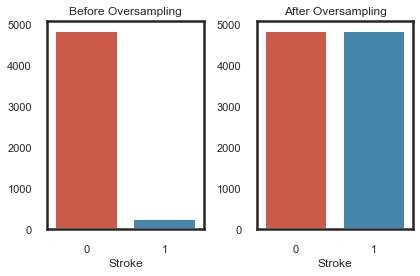

In [37]:
# creates a bar graph of the total number of non stroke cases vs stroke cases before sampling
fig, (ax1, ax2) = plt.subplots(1, 2)

sns.barplot(x=['0', '1'], y =[sum(test == 0), sum(test == 1)], ax = ax1)
ax1.set_title("Before Oversampling")
ax1.set_xlabel('Stroke')

#Using SMOTE to balance the Data
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42) 
train, test = sm.fit_resample(train, test) 

# creates a bar graph of the total number of non stroke cases vs stroke cases after sampling
sns.barplot(x=['0', '1'], y =[sum(test == 0), sum(test == 1)], ax = ax2)
ax2.set_title("After Oversampling")
ax2.set_xlabel('Stroke')

plt.tight_layout()
plt.show()

<li> After using SMOTE, the dataset spread is more even</li>

In [38]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size = 0.2, random_state = 42,shuffle = True)

In [39]:
# Score imports
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

In [40]:
# Algorithms
logReg = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
svc = SVC()
knn = KNeighborsClassifier()
gnb = GaussianNB()

# Predictions:

## K-NN Classifier Prediction:

In [41]:
# K-NN Classifier

knn.fit(X_train, y_train)

prediction = knn.predict(X_test)

print(f"Accuracy Score : {round(accuracy_score(y_test, prediction) * 100, 2)}%")

Accuracy Score : 88.99%


<li> Before Hyper Parameter tuning, the K-NN model accuracy is 91% according to sklearn accuracy test</li>

In [42]:
# prints classification report from sklearn
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88       976
           1       0.84      0.96      0.90       968

    accuracy                           0.89      1944
   macro avg       0.90      0.89      0.89      1944
weighted avg       0.90      0.89      0.89      1944



<li> Before Hyper Parameter tuning, The K-NN model has a f1-score of 0.90 for non-strokes & 0.92 for stroke 

In [43]:
#stores predictions in dataframe
dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})
dataframe

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1939,1,1
1940,0,0
1941,0,0
1942,0,0


<li> Dataframe stores Actual values and Predicted values which is later used for evaluating the results</li>

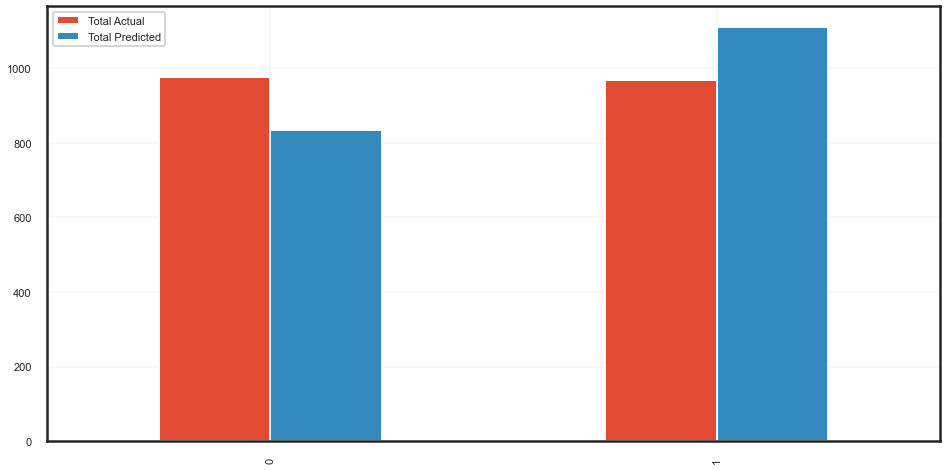

,Total Actual,Total Predicted
0,976,834
1,968,1110


In [44]:
#Selects the rows of the dataframe and counts all the values
totalActual = dataframe['Actual'].value_counts()
totalPredicted = dataframe['Predicted'].value_counts()


dataframe2 = pd.DataFrame({'Total Actual': totalActual,  'Total Predicted': totalPredicted})
df1 = dataframe2

#Plots the actual and predicted values
df1.plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.1', color='grey')
plt.show()
dataframe2


The results illustrate:
<li>The model performed well using K-NN</li>
<li> The model under predicts non strokes</li>
<li> The model over predicts stroke victims</li>


## Naive Bayes Classifer Predictions:

In [45]:
# Naive Bayes

gnb.fit(X_train, y_train)

prediction = gnb.predict(X_test)

print(f"Accuracy Score : {round(accuracy_score(y_test, prediction) * 100, 2)}%")

Accuracy Score : 66.62%


<li> Before Hyper Parameter tuning, Naive Bayes accuracy score using sklearn is 65.64%</li>

In [46]:
# prints classification report from sklearn
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.97      0.35      0.51       976
           1       0.60      0.99      0.75       968

    accuracy                           0.67      1944
   macro avg       0.78      0.67      0.63      1944
weighted avg       0.78      0.67      0.63      1944



<li>Before Hyper Parameter Tuning Naive Bayes f1_score is 0.51 for non-strokes & 0.74 for strokes</li>

In [47]:
#stores predictions in dataframe
dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})
dataframe

,Actual,Predicted
0,0,0
1,0,1
2,0,1
3,0,0
4,1,1
...,...,...
1939,1,1
1940,0,0
1941,0,1
1942,0,1


<li> Dataframe stores Actual values and Predicted values which is later used for evaluating the results</li>

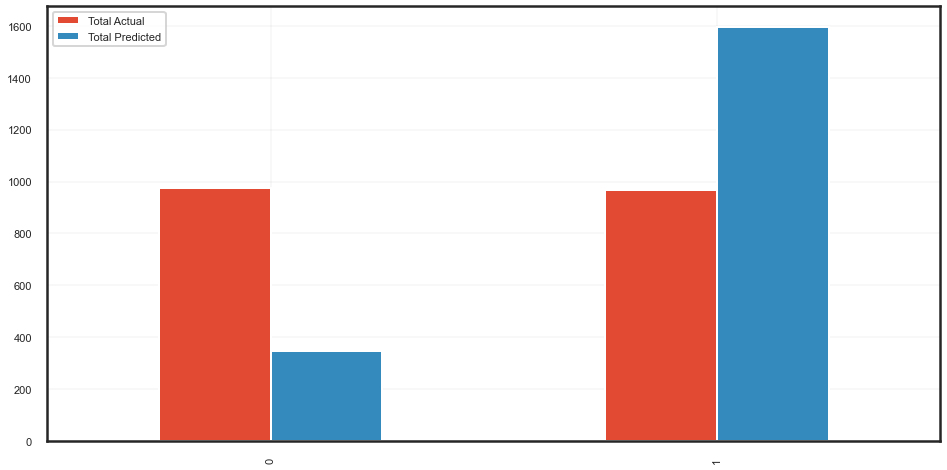

,Total Actual,Total Predicted
0,976,349
1,968,1595


In [48]:
#Selects the rows of the dataframe and counts all the values
totalActual = dataframe['Actual'].value_counts()
totalPredicted = dataframe['Predicted'].value_counts()


dataframe2 = pd.DataFrame({'Total Actual': totalActual,  'Total Predicted': totalPredicted})
df1 = dataframe2

#Plots the actual and predicted values
df1.plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.1', color='grey')
plt.show()
dataframe2

<li>The model didnt performed well using Naive Bayes when compared to K-NN results</li>
<li> The number of strokes predicted are a lot higher than the actual data</li>
<li> The number of non-strokes predicted are a lot less than the actual data </li>

## Comparing all the Algorithms:

In [49]:
# methods to get scores
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [50]:
# creates Folds
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [51]:
# method to check scroes of all algorithms
scores_logReg = []
scores_dtc = []
scores_rfc = []
scores_svc = []
scores_knn = []
score_gnb = []

#for loop to split data into fold and check scores of each algorithm
for train_index, test_index in kf.split(train,test):
    X_train, X_test, y_train, y_test = train[train_index], train[test_index], \
                                        test[train_index], test[test_index]   
                                        
    scores_logReg.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
    scores_dtc.append(get_score(DecisionTreeClassifier(), X_train, X_test, y_train, y_test))
    scores_rfc.append(get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test))
    scores_svc.append(get_score(SVC(), X_train, X_test, y_train, y_test))
    scores_knn.append(get_score(KNeighborsClassifier(), X_train, X_test, y_train, y_test))
    score_gnb.append(get_score(GaussianNB(), X_train, X_test, y_train, y_test))

In [52]:
# prints scores
print("Logistic Regression score:", scores_logReg)  
print("Decision Tree score:", scores_dtc)  
print("Random Forest score:", scores_rfc)  
print("Support Vector Machine score:", scores_svc)  
print("K-Nearest Neighbour score:", scores_knn)  
print("Naive Bayes score:", score_gnb)   


Logistic Regression score: [0.7921810699588477, 0.7880658436213992, 0.7767489711934157, 0.7818930041152263, 0.8029835390946503]
Decision Tree score: [0.9233539094650206, 0.8945473251028807, 0.8919753086419753, 0.904320987654321, 0.8930041152263375]
Random Forest score: [0.9516460905349794, 0.9434156378600823, 0.9356995884773662, 0.9449588477366255, 0.9537037037037037]
Support Vector Machine score: [0.8549382716049383, 0.845164609053498, 0.8482510288065843, 0.8569958847736625, 0.8600823045267489]
K-Nearest Neighbour score: [0.8899176954732511, 0.8919753086419753, 0.875, 0.897633744855967, 0.8986625514403292]
Naive Bayes score: [0.6661522633744856, 0.661522633744856, 0.6481481481481481, 0.6646090534979424, 0.6599794238683128]


In [53]:
# method to get sum of array
def _sum(arr):
    sum = 0
    for i in arr:
        sum = sum + i
    return sum

In [54]:
# prints Average scores
print("Logistic Regression Average score:", {round(_sum(scores_logReg)/len(scores_logReg),2)})  
print("Decision Tree Average score:", {round(_sum(scores_dtc)/len(scores_dtc),2)})  
print("Random Forest Average score:", {round(_sum(scores_rfc)/len(scores_rfc),2)})  
print("Support Vector Machine Average score:", {round(_sum(scores_svc)/len(scores_svc),2)})  
print("K-Nearest Neighbour Average score:", {round(_sum(scores_knn)/len(scores_knn),2)})  
print("Naive Bayes Average score:", {round(_sum(score_gnb)/len(score_gnb),2)}) 

Logistic Regression Average score: {0.79}
Decision Tree Average score: {0.9}
Random Forest Average score: {0.95}
Support Vector Machine Average score: {0.85}
K-Nearest Neighbour Average score: {0.89}
Naive Bayes Average score: {0.66}


Algorithm Performance (In order):
<li>Random Forest </li>
<li>K-NN & Decision Tree </li>
<li>SVC </li>
<li>Logistic Regression </li>
<li>Naive Bayes </li>

### Cross Validation Scores:

In [55]:
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

# k=5, split the data into 5 equal parts & shuffles the data
kfold = KFold(n_splits=5, random_state=42, shuffle=True)

# Arrays to hold the scores 
xyz=[]
accuracy=[]
std=[]
classifiers=['Logistic Regression',
             'SVC',
             'Random Forest',
             'DT',
             'Gnb',
             'KNeighbors']

# Variable to hold model names
models=[LogisticRegression(),
        SVC(),
        RandomForestClassifier(),
        DecisionTreeClassifier(),
        GaussianNB(),
        KNeighborsClassifier()]

# for loop to iterate through the models and get the scores and standard deviation
for i in models:
    model = i
    cv_result = cross_val_score(model,train,test, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

# Stores the scores in a dataframe
models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
models_dataframe2

,CV Mean,Std
Logistic Regression,0.788374,0.009002
SVC,0.853086,0.005546
Random Forest,0.944856,0.004617
DT,0.902881,0.012665
Gnb,0.660082,0.006354
KNeighbors,0.890638,0.008487


Algorithm Performance using Cross Validation method (in order):
<li>Random Forest </li>
<li>Decision Tree </li>
<li> K-NN </li>
<li>SVC </li>
<li>Logistic Regression </li>
<li>Naive Bayes </li>


## Selecting Best Hyper Parameters:

In [56]:
# Imports the required modules
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

### K-NN Hyper Parameters Turning:

In [57]:
#List Hyperparameters that we want to tune.
n_neighbors = list(range(1,31))
p=[1,2]
weights = ['uniform', 'distance']

#Convert to dictionary
hyperparameters = dict( n_neighbors=n_neighbors, p=p,weights=weights)

#Create new KNN object
knn_2 = KNeighborsClassifier()

#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=5)

#Fit the model
best_model = clf.fit(X_train,y_train)

#Print The value of best Hyperparameters
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best weights:', best_model.best_estimator_.get_params()['weights'])

Best p: 1
Best n_neighbors: 1
Best weights: uniform


In [58]:
# KNN Pipeline


pipeline = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors = 1, p = 1, weights = 'uniform')) 

pipeline.fit(X_train, y_train)
prediction = pipeline.predict(X_test)

print(f"Accuracy Score : {round(accuracy_score(y_test, prediction) * 100, 2)}%")

Accuracy Score : 94.24%


<li> After Hyper Parameter tuning, the accuracy score of K-NN is 96.09%</li>
<li> After Hyper Parameter turning, the accuracy score has increased by 5.19%</li>

#### K-NN Preditction results (Tuned Hyper Paramters):

In [59]:
# prints classification report from sklearn
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       979
           1       0.92      0.97      0.94       965

    accuracy                           0.94      1944
   macro avg       0.94      0.94      0.94      1944
weighted avg       0.94      0.94      0.94      1944



<li> After Hyper Parameter tuning, the f1_score has increased to 0.96 for both stroke/non-stroke

In [60]:
#stores predictions in dataframe
dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})
dataframe

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
1939,1,1
1940,1,1
1941,1,1
1942,1,1


<li> Dataframe stores Actual values and Predicted values which is later used for evaluating the results</li>

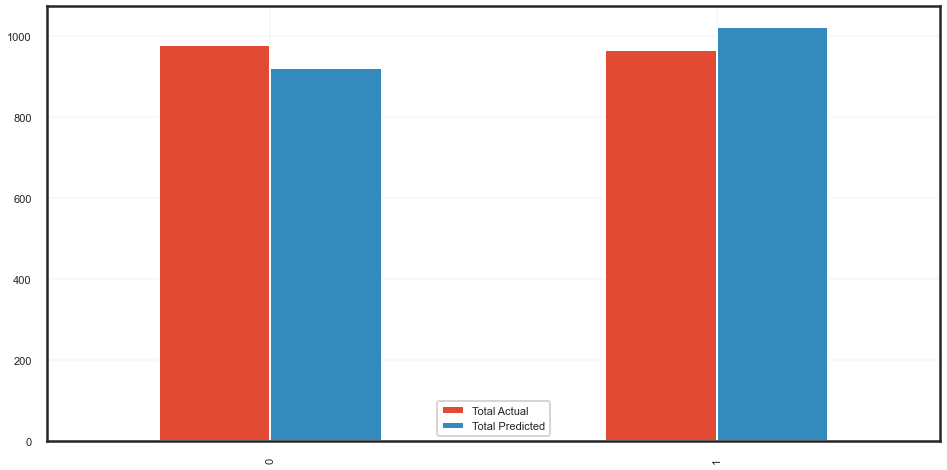

,Total Actual,Total Predicted
0,979,921
1,965,1023


In [61]:
#Selects the rows of the dataframe and counts all the values
totalActual = dataframe['Actual'].value_counts()
totalPredicted = dataframe['Predicted'].value_counts()


dataframe2 = pd.DataFrame({'Total Actual': totalActual,  'Total Predicted': totalPredicted})
df1 = dataframe2

#Plots the actual and predicted values
df1.plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.1', color='grey')
plt.show()
dataframe2

<li>The model performed better after tuning the parameters</li>
<li> The number of strokes predicted are closer to the actual data</li>
<li> The number of non-strokes predicted are closer to the actual data </li>

### Naive Bayes Hyper Parameters Tuning:

In [62]:
#Naive Bayes Pipeline
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

pipeline = make_pipeline(MinMaxScaler(), GridSearchCV(GaussianNB(), param_grid_nb, verbose=1, cv = 5,n_jobs=1, refit = True) )

pipeline.fit(X_train, y_train)
prediction = pipeline.predict(X_test)

print(f"Accuracy Score : {round(accuracy_score(y_test, prediction) * 100, 2)}%")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Accuracy Score : 75.0%


<li> After Hyper Parameter tuning, the accuracy score has increased to 72.22%</li>
<li> Accuracy score has increased by 5.6%</li>

#### Naive Bayes Preditction results (Tuned Hyper Paramters):

In [63]:
# prints classification report from sklearn
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.87      0.59      0.71       979
           1       0.69      0.91      0.78       965

    accuracy                           0.75      1944
   macro avg       0.78      0.75      0.74      1944
weighted avg       0.78      0.75      0.74      1944



<li> After Hyper Parameter turning, the f1_score has increased to 0.65 & 0.77 from 0.51 & 0.71

In [64]:
#stores predictions in dataframe
dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})
dataframe

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
1939,1,1
1940,1,1
1941,1,1
1942,1,1


<li> Dataframe stores Actual values and Predicted values which is later used for evaluating the results</li>

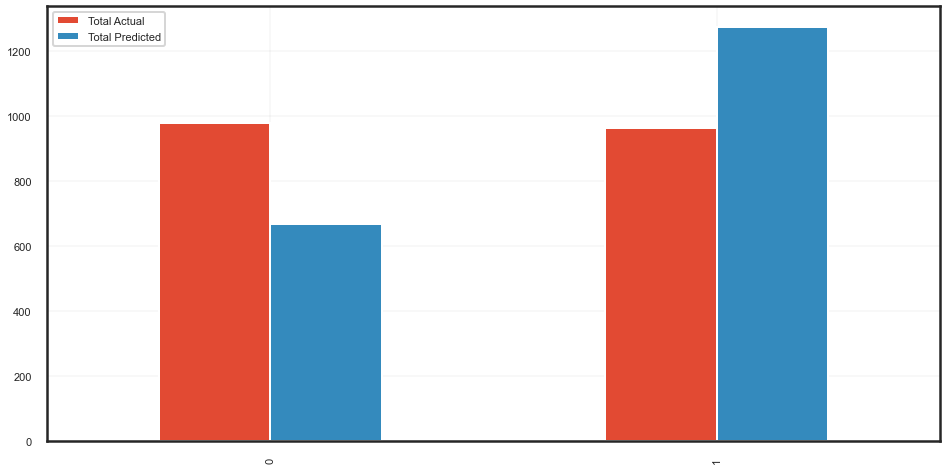

In [65]:
#Selects the rows of the dataframe and counts all the values
totalActual = dataframe['Actual'].value_counts()
totalPredicted = dataframe['Predicted'].value_counts()


dataframe2 = pd.DataFrame({'Total Actual': totalActual,  'Total Predicted': totalPredicted})
df1 = dataframe2

#Plots the actual and predicted values
df1.plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.1', color='grey')
plt.show()

<li>The model performed better after tuning the parameters</li>
<li> The number of strokes predicted are closer to the actual data</li>
<li> The number of non-strokes predicted are closer to the actual data </li>
<li> The overall model performance is still low compared to using K-NN and Random Forest</li>

### Random Forest Parameters Turning:

In [66]:
# Random Forest Pipeline
grid_params = {
 'n_estimators' : [200,500],
 'max_features' : ['auto','log2' ,'sqrt'],
 'bootstrap' : [True, False]
 }

pipeline = make_pipeline(MinMaxScaler(), GridSearchCV(RandomForestClassifier(), grid_params, verbose=1, cv = 5,n_jobs=1, refit = True) )
pipeline.fit(X_train, y_train)
prediction = pipeline.predict(X_test)

print(f"Accuracy Score : {round(accuracy_score(y_test, prediction) * 100, 2)}%")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Accuracy Score : 95.06%


<li>The accuracy score of random forest is 96.5% <li>
<li> After Hyper Parameter tuning, the accuracy score has increased by 0.3% </li>

#### Random Forest Preditction results (Tuned Hyper Paramters):

In [67]:
# prints classification report from sklearn
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       979
           1       0.95      0.96      0.95       965

    accuracy                           0.95      1944
   macro avg       0.95      0.95      0.95      1944
weighted avg       0.95      0.95      0.95      1944



<li> After Hyper Parameter tuning, the f1_score is similiar: 0.97 & 0.96

In [68]:
#stores predictions in dataframe
dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})
dataframe

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,0
...,...,...
1939,1,1
1940,1,1
1941,1,1
1942,1,1


<li> Dataframe stores Actual values and Predicted values which is later used for evaluating the results</li>

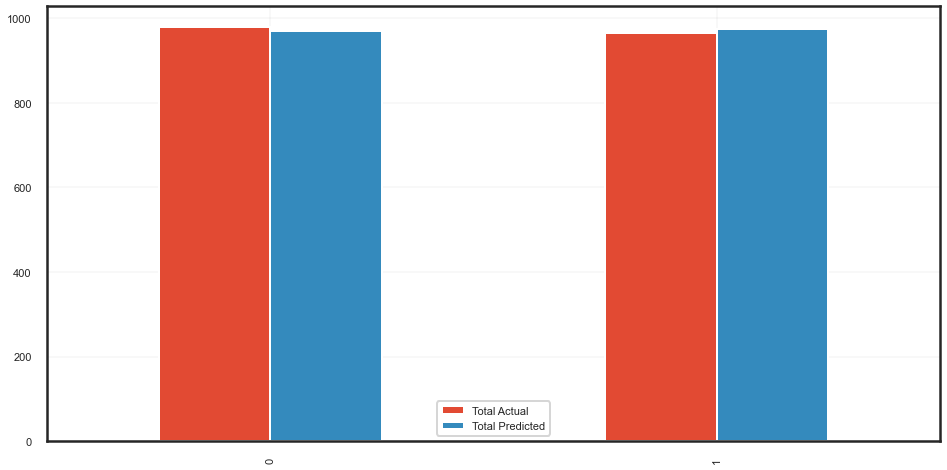

,Total Actual,Total Predicted
0,979,969
1,965,975


In [69]:
#Selects the rows of the dataframe and counts all the values
totalActual = dataframe['Actual'].value_counts()
totalPredicted = dataframe['Predicted'].value_counts()


dataframe2 = pd.DataFrame({'Total Actual': totalActual,  'Total Predicted': totalPredicted})
df1 = dataframe2

#Plots the actual and predicted values
df1.plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.1', color='grey')
plt.show()
dataframe2

The results illustrate:
<li> Random Forest perfromed very well</li>
<li> Predicted values follow a close trend to Actual data </li>

In [70]:
data.head()

,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,...,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1
0,0.816895,0.801265,0.301260,1,0,1,0,1,0,0,...,0,1,0,1,0,0,1,0,0,1
1,0.743652,0.679023,0.212981,1,1,0,0,1,0,0,...,1,0,0,0,1,0,1,0,1,0
2,0.975586,0.234512,0.254296,1,0,1,0,1,0,0,...,1,0,0,0,1,0,1,0,0,1
3,0.597168,0.536008,0.276060,1,1,0,0,1,0,0,...,0,1,0,0,0,1,1,0,1,0
4,0.963379,0.549349,0.156930,1,1,0,0,1,0,0,...,1,0,0,0,1,0,0,1,1,0


In [71]:
pd.DataFrame(X_test).head(1)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.743652,0.679023,0.212981,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


age = []
avg_glucose_level = []
bmi = []
gender_Female = []
gender_Male = []
ever_married_No = []
ever_married_Yes = []
work_type_Govt_job = []
work_type_Never_worked = []
work_type_Private = []
work_type_self_employed = []
work_type_children = []
Residence_type_Rural = []
Residence_type_Urban = []
smoking_status_Unknown = []
smoking_status_formely_smoked = []
smoking_status_never_smoked = []
smoking_status_smokes = []
hypertension_0 = []
hypertension_1 = []
heart_disease_0 = []
heart_disease_1 = []


In [81]:
def getDataFrame(age, avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease):
    
    # gender
    if gender == 1:
        gender_Male = 1.0
        gender_Female = 0.0
    else:
        gender_Female = 1.0
        gender_Male = 0.0

    # marriage
    if ever_married == 1:
        ever_married_Yes = 1.0
        ever_married_No = 0.0
    else:
        ever_married_Yes = 0.0
        ever_married_No = 1.0

    #work type
    if work_type == "Govt_job":
        work_type_Govt_job = 1.0
        work_type_Never_worked = 0.0
        work_type_Private = 0.0
        work_type_self_employed = 0.0
        work_type_children = 0.0
    elif work_type == "Never_worked":
        work_type_Govt_job = 0.0
        work_type_Never_worked = 1.0
        work_type_Private = 0.0
        work_type_self_employed = 0.0
        work_type_children = 0.0
    elif work_type == "Private":
        work_type_Govt_job = 0.0
        work_type_Never_worked = 0.0
        work_type_Private = 1.0
        work_type_self_employed = 0.0
        work_type_children = 0.0
    elif work_type == "self-employed":
        work_type_Govt_job = 0.0
        work_type_Never_worked = 0.0
        work_type_Private = 0.0
        work_type_self_employed = 1.0
        work_type_children = 0.0
    else: 
        work_type_Govt_job = 0.0
        work_type_Never_worked = 0.0
        work_type_Private = 0.0
        work_type_self_employed = 0.0
        work_type_children = 1.0
    
    #Residence type
    if Residence_type == 1:
        Residence_type_Rural = 1.0
        Residence_type_Urban = 0.0
    else:
        Residence_type_Rural = 0.0
        Residence_type_Urban = 1.0

    #smoking status
    if smoking_status == "formerly smoked":
        smoking_status_formely_smoked = 1.0
        smoking_status_never_smoked = 0.0
        smoking_status_smokes = 0.0
        smoking_status_Unknown = 0.0
    elif smoking_status == "never smoked":
        smoking_status_formely_smoked = 0.0
        smoking_status_never_smoked = 1.0
        smoking_status_smokes = 0.0
        smoking_status_Unknown = 0.0
    elif smoking_status == "Unknown":
        smoking_status_formely_smoked = 0.0
        smoking_status_never_smoked = 0.0
        smoking_status_smokes = 0.0
        smoking_status_Unknown = 1.0       
    else:
        smoking_status_formely_smoked = 0.0
        smoking_status_never_smoked = 0.0
        smoking_status_smokes = 1.0
        smoking_status_Unknown = 0.0

    #hypertension
    if hypertension == 0:
        hypertension_0 = 1.0
        hypertension_1 = 0.0
    else:
        hypertension_0 = 0.0
        hypertension_1 = 1.0

    #heart disease
    if heart_disease == 0:
        heart_disease_0 = 1.0
        heart_disease_1 = 0.0
    else:
        heart_disease_0 = 0.0
        heart_disease_1 = 1.0


    dataFrame3 = {
        'age': [age],
        'avg_glucose_level': [avg_glucose_level],
        'bmi': [bmi],
        'gender_Female': gender_Female,
        'gender_Male': gender_Male,
        'ever_married_No': ever_married_No,
        'ever_married_Yes': ever_married_Yes,
        'work_type_Govt_job': work_type_Govt_job,
        'work_type_Never_worked': work_type_Never_worked,
        'work_type_Private': work_type_Private,
        'work_type_self_employed': work_type_self_employed,
        'work_type_children': work_type_children,
        'Residence_type_Rural': Residence_type_Rural,
        'Residence_type_Urban': Residence_type_Urban,
        'smoking_status_Unknown': smoking_status_Unknown,
        'smoking_status_formely_smoked': smoking_status_formely_smoked,
        'smoking_status_never_smoked': smoking_status_never_smoked,
        'smoking_status_smokes': smoking_status_smokes,
        'hypertension_0':hypertension_0,
        'hypertension_1':hypertension_1,
        'heart_disease_0':heart_disease_0,
        'heart_disease_1':heart_disease_1
    }


    df = pd.DataFrame(dataFrame3)

    
    
    return df

In [73]:
def getPrediction(age, avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease):
    
    PredictDataFrame1 = getDataFrame(age, avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease)

    pipeline = make_pipeline(StandardScaler(),RandomForestClassifier()) 
    pipeline.fit(X_train, y_train)
    prediction = pipeline.predict(PredictDataFrame1)
    
    return prediction

In [82]:
age = 67
avg_glucose_level = 228.69
bmi = 36.6
gender = 1
ever_married = 1
work_type = 'Private'
Residence_type = 0
smoking_status = 'formerly smoked'
hypertension = 0
heart_disease = 1


df = getDataFrame(age, avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease)


pipeline = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors = 1, p = 1, weights = 'uniform')) 
pipeline.fit(X_train, y_train)
prediction = pipeline.predict(df)

print(prediction[0])
df

1


,age,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,...,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formely_smoked,smoking_status_never_smoked,smoking_status_smokes,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1
0,67,228.69,36.6,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


Please note: Application isnt full proof, therefore there is no input validation on textboxes (Please use this format for entering numbers: *228.69*) <---- **Use full stop not comma** 

In [84]:
from tkinter import *
from tkinter.ttk import Combobox


class App(object):
    def __init__(self, window):
        # radio button variables
        self.v = IntVar()
        self.v.set("python")

        self.v2 = IntVar()
        self.v2.set("python")

        self.v3 = IntVar()
        self.v3.set("python")

        self.v4 = IntVar()
        self.v4.set("python")

        self.v5 = IntVar()
        self.v5.set("python")

        lbl = Label(
            window,
            text="Please Enter Patient details below:",
            fg="black",
            font=("Arial", 16),
        )
        lbl.place(x=220, y=50)

        # Gender radio button
        lbl = Label(
            window, text="What is the patient's gender?", fg="black", font=("Arial", 12)
        )
        lbl.place(x=100, y=100)

        r1 = Radiobutton(window, text="Male", variable=self.v, value=1)
        r2 = Radiobutton(window, text="Female", variable=self.v, value=0)
        r1.place(x=450, y=100)
        r2.place(x=530, y=100)

        # Age
        lbl = Label(
            window, text="What is the patient's age?", fg="black", font=("Arial", 12)
        )
        lbl.place(x=100, y=150)

        self.txtfld1 = Entry(window, text="Enter Patient age", bd=5)
        self.txtfld1.place(x=450, y=150)

        # HyperTension
        lbl = Label(
            window,
            text="Does the patient's have Hyper Tension?",
            fg="black",
            font=("Arial", 12),
        )
        lbl.place(x=100, y=200)

        r3 = Radiobutton(window, text="Yes", variable=self.v2, value=1)
        r4 = Radiobutton(window, text="No", variable=self.v2, value=0)
        r3.place(x=450, y=200)
        r4.place(x=530, y=200)

        # Heat disease
        lbl = Label(
            window,
            text="Does the patient's have heart disease?",
            fg="black",
            font=("Arial", 12),
        )
        lbl.place(x=100, y=250)

        r5 = Radiobutton(window, text="Yes", variable=self.v3, value=1)
        r6 = Radiobutton(window, text="No", variable=self.v3, value=0)
        r5.place(x=450, y=250)
        r6.place(x=530, y=250)

        # Ever_married
        lbl = Label(
            window,
            text="Has the patient's been married before?",
            fg="black",
            font=("Arial", 12),
        )
        lbl.place(x=100, y=300)

        r7 = Radiobutton(window, text="Yes", variable=self.v4, value=1)
        r8 = Radiobutton(window, text="No", variable=self.v4, value=0)
        r7.place(x=450, y=300)
        r8.place(x=530, y=300)

        # work_type
        lbl = Label(
            window,
            text="What is the patient's occupation?",
            fg="black",
            font=("Arial", 12),
        )
        lbl.place(x=100, y=350)

        self.data = ("Private", "Self-employed", "Govt job", "Children", "Never worked")
        self.cb = Combobox(window, values=self.data)
        self.cb.place(x=450, y=350)

        # Residence_type
        lbl = Label(
            window,
            text="What is the patient's residence type?",
            fg="black",
            font=("Arial", 12),
        )
        lbl.place(x=100, y=400)

        r9 = Radiobutton(window, text="Urban", variable=self.v5, value=0)
        r10 = Radiobutton(window, text="Rural", variable=self.v5, value=1)
        r9.place(x=450, y=400)
        r10.place(x=530, y=400)

        # avg_glucose_level
        lbl = Label(
            window,
            text="What is the patient's average glucose level?",
            fg="black",
            font=("Arial", 12),
        )
        lbl.place(x=100, y=450)

        self.txtfld2 = Entry(window, text="Enter Patient average glucose level", bd=5)
        self.txtfld2.place(x=450, y=450)

        # BMI
        lbl = Label(
            window, text="What is the patient's BMI?", fg="black", font=("Arial", 12)
        )
        lbl.place(x=100, y=500)

        self.txtfld3 = Entry(window, text="Enter Patient BMI", bd=5)
        self.txtfld3.place(x=450, y=500)

        #smoking_status
        lbl = Label(
            window,
            text="Does the patient smoke?",
            fg="black",
            font=("Arial", 12),
        )
        lbl.place(x=100, y=550)

        self.data = ("Unknown", "smokes", "formerly smoked", "never smoked")
        self.cb2 = Combobox(window, values=self.data)
        self.cb2.place(x=450, y=550)

        # Button
        self.btn = Button(
            window, text="Predict", fg="green", command=self.MyButtonClicked
        )
        self.btn.place(x=650, y=550)

    def MyButtonClicked(self):
        print("Button clicked")
    

        age = self.txtfld1.get()
        avg_glucose_level = self.txtfld2.get()
        bmi = self.txtfld3.get()
        gender = self.v.get()
        hypertension = self.v2.get()
        heart_disease = self.v3.get()
        ever_married = self.v4.get()
        work_type = self.cb.get()
        Residence_type = self.v5.get()
        bmi = self.txtfld3.get()
        smoking_status = self.cb2.get()

        df = getDataFrame(age, avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease)


        pipeline = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors = 1, p = 1, weights = 'uniform')) 
        pipeline.fit(X_train, y_train)
        prediction = pipeline.predict(df)

        print(prediction[0])

        if prediction[0] == 0:
            lbl = Label(
            window,
            text="Patient is not at risk of stroke!",
            fg="black",
            font=("Arial", 12),
            )
            lbl.place(x=720, y=550)
        else:
            lbl = Label(
            window,
            text="Patient is at risk of stroke!",
            fg="black",
            font=("Arial", 12),
            )
            lbl.place(x=720, y=550)
        
        



if __name__ == "__main__":
    window = Tk()
    app = App(window)
    window.title("Stroke Prediction Application")
    window.geometry("950x600+600+150")
    mainloop()

Button clicked


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Sean\AppData\Local\Programs\Python\Python310\lib\tkinter\__init__.py", line 570, in get
    return self._tk.getint(value)
_tkinter.TclError: expected integer but got "python"

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\Sean\AppData\Local\Programs\Python\Python310\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\Sean\AppData\Local\Temp\ipykernel_15232\687959386.py", line 167, in MyButtonClicked
    gender = self.v.get()
  File "c:\Users\Sean\AppData\Local\Programs\Python\Python310\lib\tkinter\__init__.py", line 572, in get
    return int(self._tk.getdouble(value))
_tkinter.TclError: expected floating-point number but got "python"


Button clicked
1


# Summary:

The K-NN algorithm performed better than Naive Bayes but the best algorithm for this dataset Random Forest
The models accuracy scores:
<li>Random Forest: 96.5%</li>
<li>K-NN: 96.1%</li>
<li>Naive Bayes: 72.2%</li>

There is a noticeable difference between K-NN and Naive Bayes accuracy score before and after tuning the hyper parameters.\
There is a small difference in the Random Forest accuracy score after tuning the hyper parameters.

The model has been built to identify potential stroke patients based off their medical history and health habits. With an accuracy score of 96% the model can be considered a success.